In [1]:
import yt
import os
import numpy as np
import re
%matplotlib inline

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import yt.frontends
print "simulationio valid: ",'simulationio' in dir(yt.frontends)
yt.__file__

simulationio valid:  True


'/home/jmiller/programming/yt-simulationio/yt/__init__.pyc'

## Data Inspection

In [3]:
base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
source_dir=base_dir+'/'+'cactus'
fname='static-tov-vertex'
fname += '.s5'
fpath=source_dir+'/'+fname

iteration = 0
timelevel = 0

config_template=re.compile('(iteration.)(0*)({}-timelevel.)(0*)({}\Z)'.format(iteration,timelevel))
config_template.search('iteration.00-timelevel.00').group(0)
configurationname='iteration.0000000000-timelevel.0'
print fpath
print configurationname

/home/jmiller/programming/SimulationIO-yt-tests/cactus/static-tov-vertex.s5
iteration.0000000000-timelevel.0


In [4]:
num_grids = 5
dimensionality = 3
gz = np.zeros((num_grids,2,dimensionality),
              dtype='int64')
for i in range(num_grids):
    gz[i,0,...] = np.array([3,3,3])
for i in range(1,num_grids):
    gz[i,1,...] = np.array([12,12,12])
gz[0,0,...] = np.array([3,3,3])
gz[0,1,...] = np.array([2,2,2])

In [5]:
ds = yt.load(fpath,centering='vertex',
             configuration=configurationname)
""",
             ghost_zones=gz)"""

yt : [WARNING  ] 2016-12-06 15:26:20,710 Vertex-centering is experimental and may result in unexpected behaviour.
yt : [INFO     ] 2016-12-06 15:26:20,918 SimulationIO: Configuration "iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-12-06 15:26:20,929 SimulationIO: Discretization "iteration.0000000000-timelevel.0-level.00"
yt : [INFO     ] 2016-12-06 15:26:20,930 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.01"
yt : [INFO     ] 2016-12-06 15:26:20,931 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.02"
yt : [INFO     ] 2016-12-06 15:26:20,933 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.03"
yt : [INFO     ] 2016-12-06 15:26:20,935 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.04"
yt : [INFO     ] 2016-12-06 15:26:20,944 SimulationIO: CoordinateSystem "GRID-iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-12-06 15:26:20,948 SimulationIO: F

',\n             ghost_zones=gz)'

In [6]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         24389	            29
  1	     1	         27000	            30
  2	     1	         27000	            30
  3	     1	         27000	            30
  4	     1	         27000	            30
----------------------------------------------
   	     5	        132389


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 2.393e-20 Mpc
	Width: 2.393e-14 pc
	Width: 4.935e-09 AU
	Width: 7.383e+04 cm


In [7]:
for grid in ds.index.grids:
    print grid.Parent,grid.Children

None [SimulationIOGrid_0001 ([30 30 30])]
SimulationIOGrid_0000 ([29 29 29]) [SimulationIOGrid_0002 ([30 30 30])]
SimulationIOGrid_0001 ([30 30 30]) [SimulationIOGrid_0003 ([30 30 30])]
SimulationIOGrid_0002 ([30 30 30]) [SimulationIOGrid_0004 ([30 30 30])]
SimulationIOGrid_0003 ([30 30 30]) []


In [8]:
for g in ds.index.grids:
    print g.LeftEdge,g.RightEdge

[ 0.  0.  0.] code_length [ 232.  232.  232.] code_length
[ 0.  0.  0.] code_length [ 120.  120.  120.] code_length
[ 0.  0.  0.] code_length [ 60.  60.  60.] code_length
[ 0.  0.  0.] code_length [ 30.  30.  30.] code_length
[ 0.  0.  0.] code_length [ 15.  15.  15.] code_length


In [9]:
print ds.domain_width

[ 232.  232.  232.] code_length


In [10]:
for g in ds.index.grids:
    print g.Level,g.start_index,g.stop_index

0 [0 0 0] [29 29 29]
1 [0 0 0] [30 30 30]
2 [0 0 0] [30 30 30]
3 [0 0 0] [30 30 30]
4 [0 0 0] [30 30 30]


In [11]:
g1 = ds.index.grids[0]
g2 = ds.index.grids[-1]
g=g1

In [12]:
print g1.LeftEdge,g1.RightEdge
print g2.LeftEdge,g2.RightEdge
print g1['GRID::z'][0,0,0],g2['GRID::z'][0,0,0]
print g1['GRID::x'][0,0,0],g2['GRID::x'][0,0,0]
print g1['GRID::y'][0,0,0],g2['GRID::y'][0,0,0]
print g1['HYDROBASE::rho'][-1,-1,-1],g2['HYDROBASE::rho'][-1,-1,-1],g2['HYDROBASE::rho'][0,0,0]

[ 0.  0.  0.] code_length [ 232.  232.  232.] code_length
[ 0.  0.  0.] code_length [ 15.  15.  15.] code_length


yt : [INFO     ] 2016-12-06 15:26:23,831 Reading 24389 cells for fields ['GRID::z']


4.0 code_length

yt : [INFO     ] 2016-12-06 15:26:23,872 Reading 27000 cells for fields ['GRID::z']


 0.25 code_length


yt : [INFO     ] 2016-12-06 15:26:23,936 Reading 24389 cells for fields ['GRID::x']


4.0 code_length

yt : [INFO     ] 2016-12-06 15:26:23,973 Reading 27000 cells for fields ['GRID::x']


 0.25 code_length


yt : [INFO     ] 2016-12-06 15:26:24,031 Reading 24389 cells for fields ['GRID::y']


4.0 code_length

yt : [INFO     ] 2016-12-06 15:26:24,040 Reading 27000 cells for fields ['GRID::y']


 0.25 code_length


yt : [INFO     ] 2016-12-06 15:26:24,105 Reading 24389 cells for fields ['HYDROBASE::rho']


1e-10 m_geom/l_geom**3

yt : [INFO     ] 2016-12-06 15:26:24,146 Reading 27000 cells for fields ['HYDROBASE::rho']


 1e-10 m_geom/l_geom**3 0.00126083831648 m_geom/l_geom**3


In [13]:
print "level\tgrid\t\t\t\t   child\t\t\t\tparent"
print "---------------------------------------------------------------------------------------------------------"
for g in ds.index.grids:
    print g.Level,"\t",g,g.Children,g.Parent

level	grid				   child				parent
---------------------------------------------------------------------------------------------------------
0 	SimulationIOGrid_0000 ([29 29 29]) [SimulationIOGrid_0001 ([30 30 30])] None
1 	SimulationIOGrid_0001 ([30 30 30]) [SimulationIOGrid_0002 ([30 30 30])] SimulationIOGrid_0000 ([29 29 29])
2 	SimulationIOGrid_0002 ([30 30 30]) [SimulationIOGrid_0003 ([30 30 30])] SimulationIOGrid_0001 ([30 30 30])
3 	SimulationIOGrid_0003 ([30 30 30]) [SimulationIOGrid_0004 ([30 30 30])] SimulationIOGrid_0002 ([30 30 30])
4 	SimulationIOGrid_0004 ([30 30 30]) [] SimulationIOGrid_0003 ([30 30 30])


In [14]:
for g in ds.index.grids:
    print g.Level,g.LeftEdge,g.RightEdge,g.dds

0 [ 0.  0.  0.] code_length [ 232.  232.  232.] code_length [ 8.  8.  8.] code_length
1 [ 0.  0.  0.] code_length [ 120.  120.  120.] code_length [ 4.  4.  4.] code_length
2 [ 0.  0.  0.] code_length [ 60.  60.  60.] code_length [ 2.  2.  2.] code_length
3 [ 0.  0.  0.] code_length [ 30.  30.  30.] code_length [ 1.  1.  1.] code_length
4 [ 0.  0.  0.] code_length [ 15.  15.  15.] code_length [ 0.5  0.5  0.5] code_length


In [15]:
print ds.domain_left_edge
print ds.domain_right_edge

[ 0.  0.  0.] code_length
[ 232.  232.  232.] code_length


In [16]:
for f in ds.field_list:
    fv = g[f]
    if fv.size == 0: continue
    print f, fv.min(), fv.max()

yt : [INFO     ] 2016-12-06 15:26:24,530 Reading 27000 cells for fields ['ADMBASE::alp']


('simulationio', 'ADMBASE::alp') 0.67191344808 dimensionless 0.946656302151 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,600 Reading 27000 cells for fields ['ADMBASE::beta[0]']


('simulationio', 'ADMBASE::beta[0]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,637 Reading 27000 cells for fields ['ADMBASE::beta[1]']


('simulationio', 'ADMBASE::beta[1]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,673 Reading 27000 cells for fields ['ADMBASE::beta[2]']


('simulationio', 'ADMBASE::beta[2]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,734 Reading 27000 cells for fields ['ADMBASE::g[00]']


('simulationio', 'ADMBASE::g[00]') 1.11420001062 dimensionless 2.0225886494 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,788 Reading 27000 cells for fields ['ADMBASE::g[01]']


('simulationio', 'ADMBASE::g[01]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,844 Reading 27000 cells for fields ['ADMBASE::g[02]']


('simulationio', 'ADMBASE::g[02]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,869 Reading 27000 cells for fields ['ADMBASE::g[11]']


('simulationio', 'ADMBASE::g[11]') 1.11420001062 dimensionless 2.0225886494 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,927 Reading 27000 cells for fields ['ADMBASE::g[12]']


('simulationio', 'ADMBASE::g[12]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:24,997 Reading 27000 cells for fields ['ADMBASE::g[22]']


('simulationio', 'ADMBASE::g[22]') 1.11420001062 dimensionless 2.0225886494 dimensionless


yt : [INFO     ] 2016-12-06 15:26:25,063 Reading 27000 cells for fields ['ADMBASE::k[00]']


('simulationio', 'ADMBASE::k[00]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:25,092 Reading 27000 cells for fields ['ADMBASE::k[01]']


('simulationio', 'ADMBASE::k[01]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:25,132 Reading 27000 cells for fields ['ADMBASE::k[02]']


('simulationio', 'ADMBASE::k[02]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:25,190 Reading 27000 cells for fields ['ADMBASE::k[11]']


('simulationio', 'ADMBASE::k[11]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:25,252 Reading 27000 cells for fields ['ADMBASE::k[12]']


('simulationio', 'ADMBASE::k[12]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:25,276 Reading 27000 cells for fields ['ADMBASE::k[22]']


('simulationio', 'ADMBASE::k[22]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-12-06 15:26:25,338 Reading 27000 cells for fields ['GRID::r']


('simulationio', 'GRID::r') 0.560918218418 code_length 25.550195733 code_length
('simulationio', 'GRID::x') 0.25 code_length 14.75 code_length
('simulationio', 'GRID::y') 0.25 code_length 14.75 code_length
('simulationio', 'GRID::z') 0.25 code_length 14.75 code_length


yt : [INFO     ] 2016-12-06 15:26:25,427 Reading 27000 cells for fields ['HYDROBASE::eps']


('simulationio', 'HYDROBASE::eps') 1e-08 c**2 0.126083831648 c**2


yt : [INFO     ] 2016-12-06 15:26:25,491 Reading 27000 cells for fields ['HYDROBASE::press']


('simulationio', 'HYDROBASE::press') 1e-18 m_geom/(l_geom*t_geom**2) 0.000158983418124 m_geom/(l_geom*t_geom**2)
('simulationio', 'HYDROBASE::rho') 1e-10 m_geom/l_geom**3 0.00126083831648 m_geom/l_geom**3


yt : [INFO     ] 2016-12-06 15:26:25,544 Reading 27000 cells for fields ['HYDROBASE::vel[0]']


('simulationio', 'HYDROBASE::vel[0]') 0.0 c 0.0 c


yt : [INFO     ] 2016-12-06 15:26:25,615 Reading 27000 cells for fields ['HYDROBASE::vel[1]']


('simulationio', 'HYDROBASE::vel[1]') 0.0 c 0.0 c


yt : [INFO     ] 2016-12-06 15:26:25,684 Reading 27000 cells for fields ['HYDROBASE::vel[2]']


('simulationio', 'HYDROBASE::vel[2]') 0.0 c 0.0 c


yt : [INFO     ] 2016-12-06 15:26:25,744 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::H']


('simulationio', 'ML_ADMCONSTRAINTS::H') -3.45168654117e-05 m_geom/l_geom**3 8.25272790913e-05 m_geom/l_geom**3


yt : [INFO     ] 2016-12-06 15:26:25,770 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::M[0]']


('simulationio', 'ML_ADMCONSTRAINTS::M[0]') 0.0 c*m_geom 0.0 c*m_geom


yt : [INFO     ] 2016-12-06 15:26:25,831 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::M[1]']


('simulationio', 'ML_ADMCONSTRAINTS::M[1]') 0.0 c*m_geom 0.0 c*m_geom


yt : [INFO     ] 2016-12-06 15:26:25,883 Reading 27000 cells for fields ['ML_ADMCONSTRAINTS::M[2]']


('simulationio', 'ML_ADMCONSTRAINTS::M[2]') 0.0 c*m_geom 0.0 c*m_geom


In [17]:
sp = ds.sphere([0.0, 0.0, 0.0], (5, 'km'))

In [18]:
print sp

YTSphere (static-tov-vertex.s5): , center=[ 0.  0.  0.] l_geom, radius=3.38632316181 l_geom


In [19]:
print sp.quantities.keys()

['SpinParameter', 'MinLocation', 'WeightedVariance', 'TotalMass', 'AngularMomentumVector', 'WeightedAverageQuantity', 'SampleAtMaxFieldValues', 'TotalQuantity', 'CenterOfMass', 'BulkVelocity', 'Extrema', 'MaxLocation', 'SampleAtMinFieldValues']


In [20]:
for g in ds.index.grids:
    print g.start_index

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


In [21]:
print sp.quantities.total_quantity('ones')

166.0 dimensionless


In [22]:
print sp.quantities.extrema('GRID::r')

yt : [INFO     ] 2016-12-06 15:26:26,136 Reading 166 cells for fields ['GRID::r']


[ 0.56091822  3.36349572] code_length


In [23]:
print sp.quantities.total_quantity('GRID::x')

yt : [INFO     ] 2016-12-06 15:26:26,349 Reading 166 cells for fields ['GRID::x']


212.5 code_length


In [24]:
g = ds.index.grids[0]
mask = g['GRID::x'][g.child_mask]
print np.min(mask),np.max(mask)

4.0 code_length 228.0 code_length


In [25]:
center = (ds.domain_left_edge+ds.domain_right_edge)/2
width = (ds.domain_right_edge-ds.domain_left_edge)[0]
center[-1]=0
print width,center

232.0 code_length [ 116.  116.    0.] code_length


## Simple Visualization

yt : [INFO     ] 2016-12-06 15:26:26,608 Reading 3541 cells for fields ['ADMBASE::g[00]']
yt : [INFO     ] 2016-12-06 15:26:26,764 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:26,768 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:26,771 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:26,773 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:26,775 Making a fixed resolution buffer of (('simulationio', 'ADMBASE::g[00]')) 800 by 800



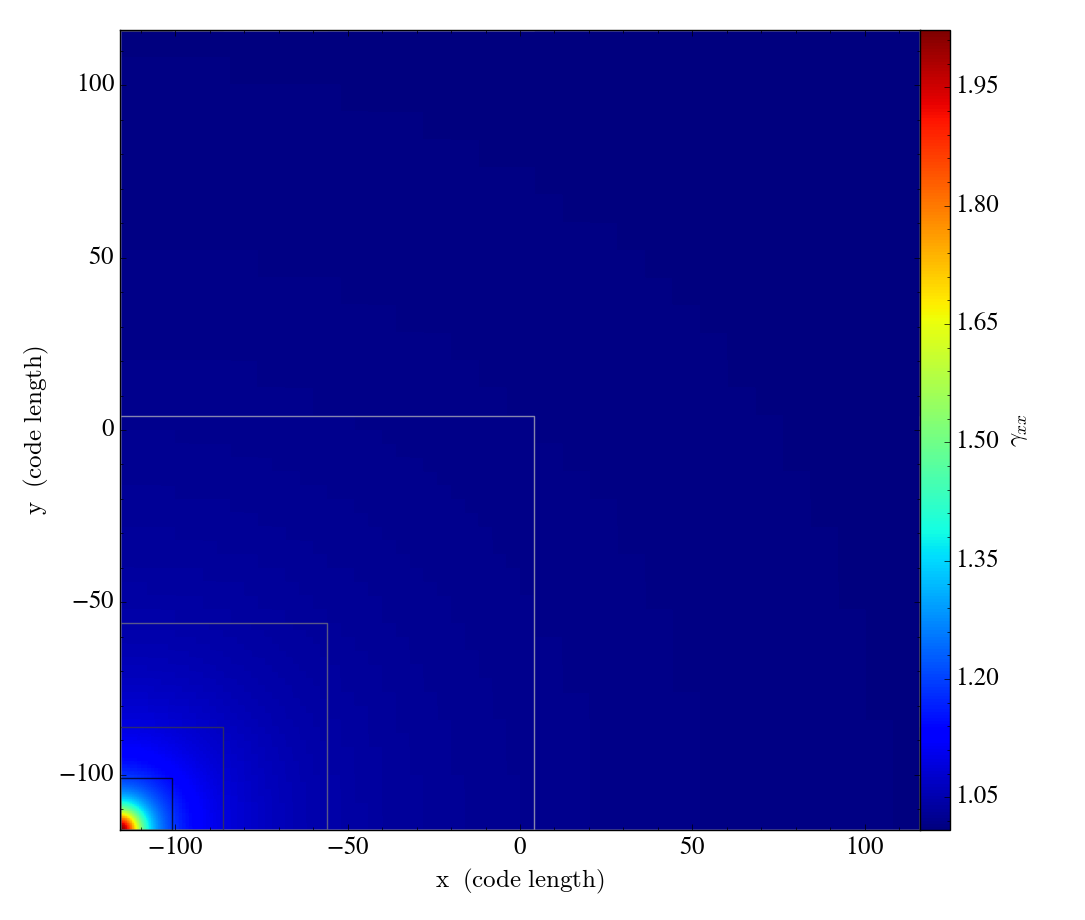

In [26]:
p = yt.SlicePlot(ds, "z", "ADMBASE::g[00]",center=center,width=width)
p.set_cmap(field="all", cmap="jet")
p.set_log('ADMBASE::g[00]',False)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-12-06 15:26:31,129 Reading 3541 cells for fields ['ADMBASE::alp']
yt : [INFO     ] 2016-12-06 15:26:31,309 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:31,315 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:31,323 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:31,324 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:31,327 Making a fixed resolution buffer of (('simulationio', 'ADMBASE::alp')) 800 by 800



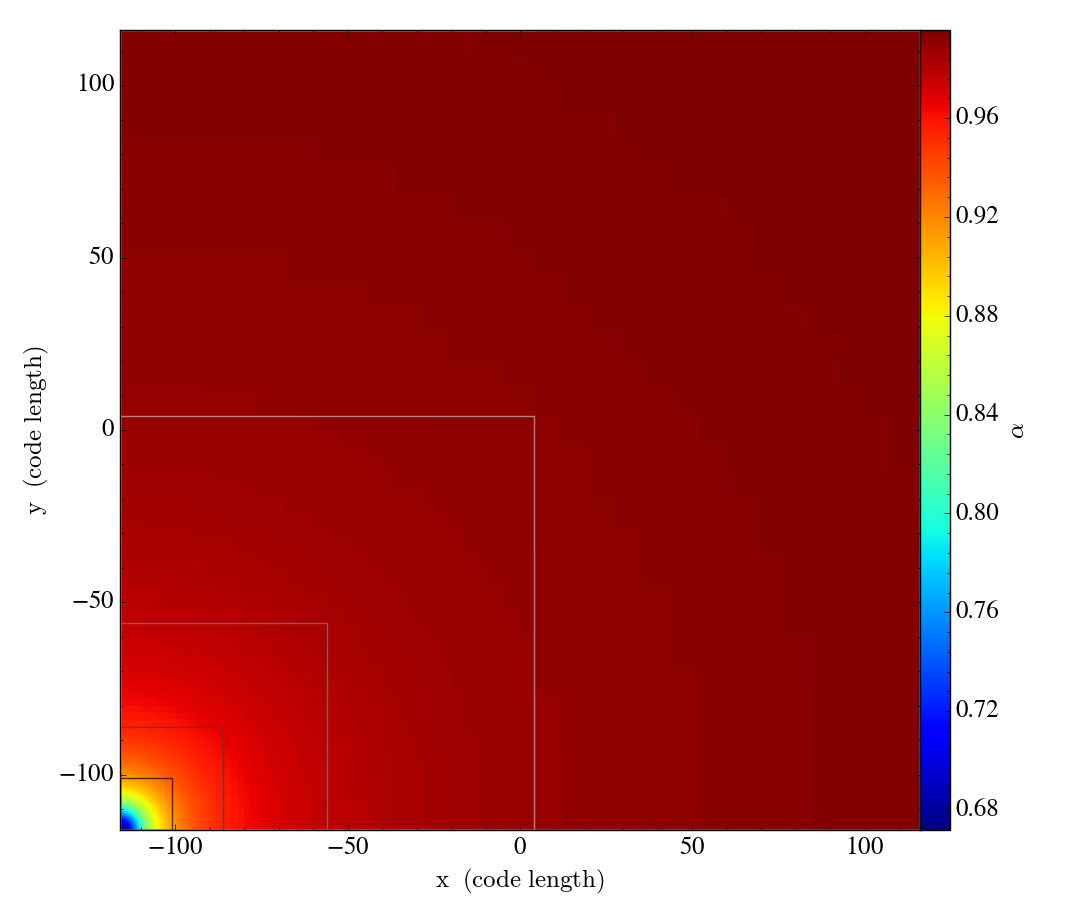

yt : [INFO     ] 2016-12-06 15:26:34,862 Saving plot sliceplot.png


['sliceplot.png']

In [27]:
p = yt.SlicePlot(ds, "z", "ADMBASE::alp",center=center,width=width)
p.set_cmap(field="all", cmap="jet")
p.set_log('ADMBASE::alp',False)
p.annotate_grids()
p.show()
p.save('sliceplot.png')

yt : [INFO     ] 2016-12-06 15:26:36,164 Reading 118889 cells for fields ['ADMBASE::alp']
yt : [INFO     ] 2016-12-06 15:26:36,378 Projection completed
yt : [INFO     ] 2016-12-06 15:26:36,385 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:36,390 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:36,402 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:36,407 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:36,409 Making a fixed resolution buffer of (('simulationio', 'ADMBASE::alp')) 800 by 800



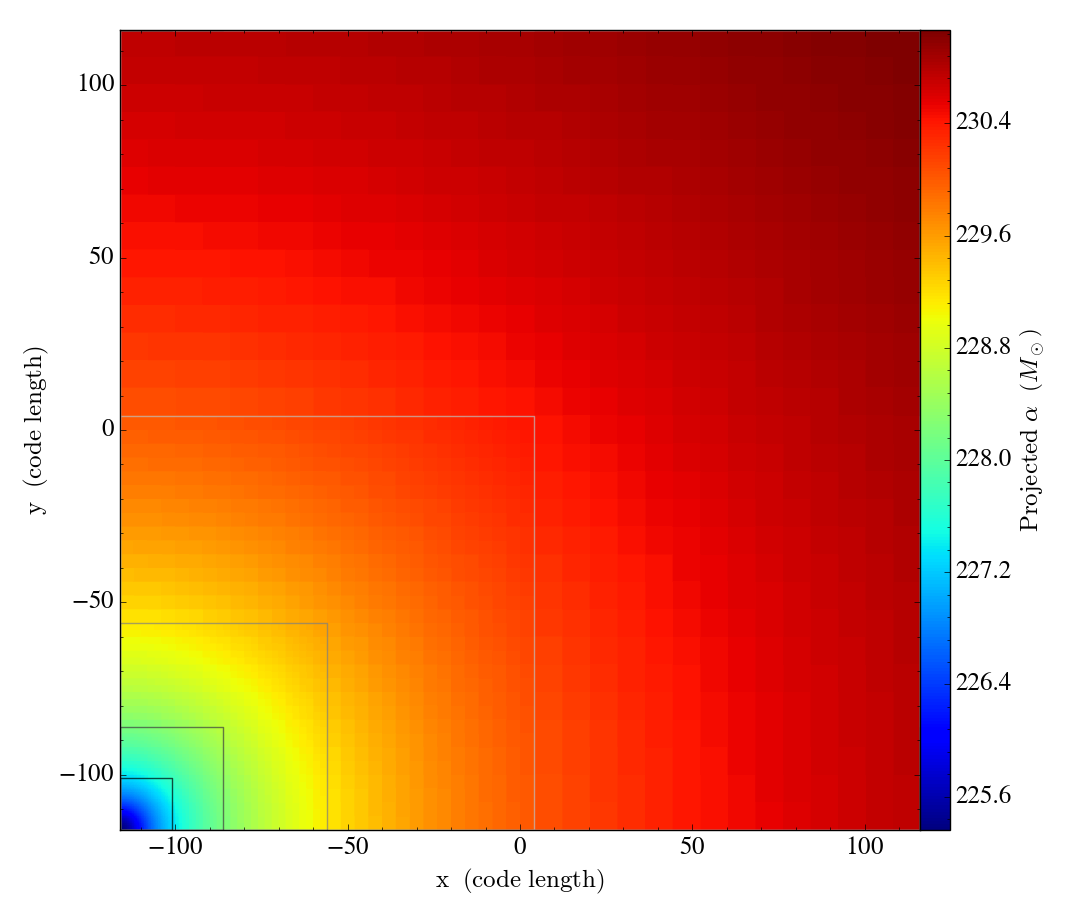

yt : [INFO     ] 2016-12-06 15:26:40,215 Saving plot projectionplot.png


['projectionplot.png']

In [28]:
prj = yt.ProjectionPlot(ds, 'z','ADMBASE::alp',center=center,width=width)
prj.set_cmap(field="all", cmap="jet")
prj.set_log('ADMBASE::alp',False)
prj.annotate_grids()
prj.show()
prj.save('projectionplot.png')

yt : [INFO     ] 2016-12-06 15:26:41,384 Reading 3541 cells for fields ['HYDROBASE::rho']
yt : [INFO     ] 2016-12-06 15:26:41,548 xlim = 0.000000 10.000000
yt : [INFO     ] 2016-12-06 15:26:41,549 ylim = 0.000000 10.000000
yt : [INFO     ] 2016-12-06 15:26:41,551 xlim = 0.000000 10.000000
yt : [INFO     ] 2016-12-06 15:26:41,552 ylim = 0.000000 10.000000
yt : [INFO     ] 2016-12-06 15:26:41,557 Making a fixed resolution buffer of (('simulationio', 'HYDROBASE::rho')) 800 by 800



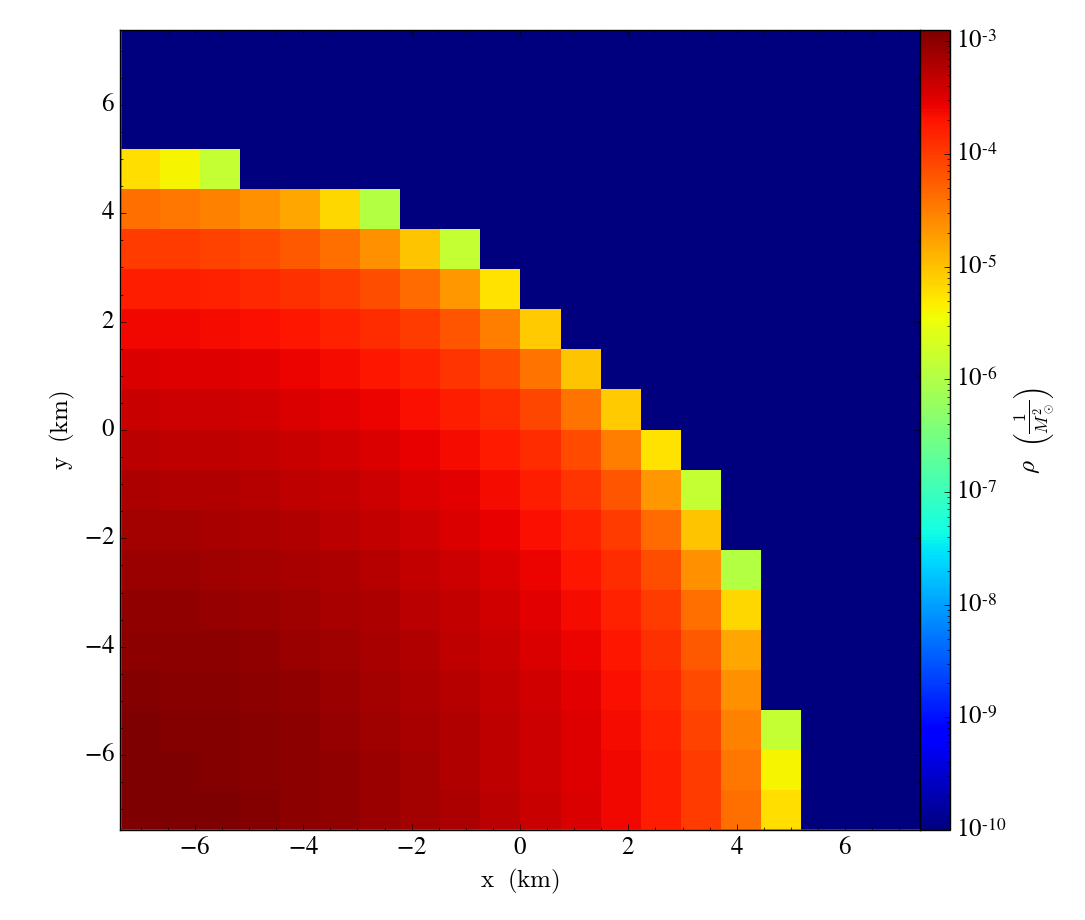

In [29]:
p = yt.SlicePlot(ds, "z", "HYDROBASE::rho",center=[5,5,0],width=10)
p.set_cmap(field="all", cmap="jet")
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-12-06 15:26:46,295 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:46,296 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:46,298 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:46,299 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:46,301 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



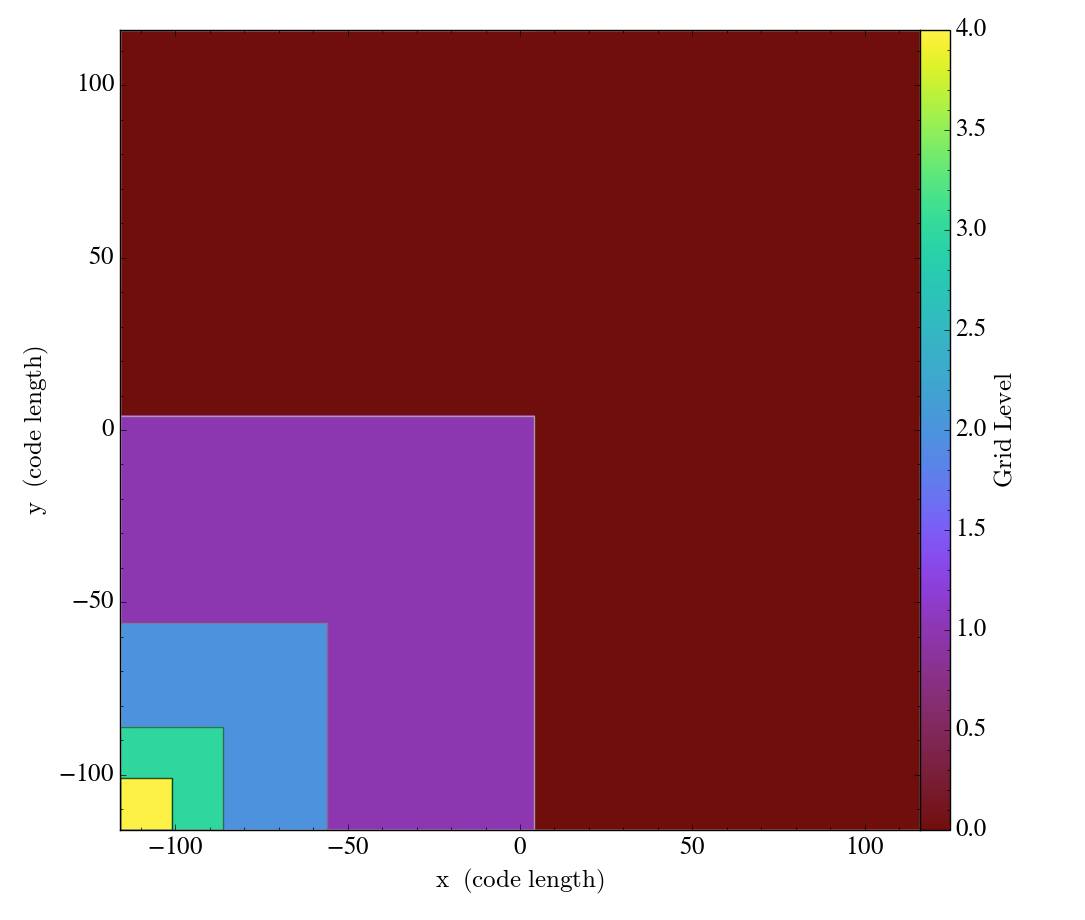

yt : [INFO     ] 2016-12-06 15:26:49,198 Saving plot grid_level_slice.png


['grid_level_slice.png']

In [ ]:
p = yt.SlicePlot(ds, 'z', "grid_level",center=center,width=width)
#p.set_cmap(field="all", cmap="jet")
p.set_log("grid_level",False)
p.annotate_grids()
p.show()
p.save('grid_level_slice.png')

In [ ]:
p = yt.ProjectionPlot(ds, 'z', "grid_level",center=center,width=width)
#p.set_cmap(field="all", cmap="jet")
p.set_log("grid_level",False)
p.annotate_grids()
p.show()
p.save('grid_level_projection.png')

yt : [INFO     ] 2016-12-06 15:26:50,640 Projection completed
yt : [INFO     ] 2016-12-06 15:26:50,646 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:50,649 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:50,651 xlim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:50,652 ylim = 0.000000 232.000000
yt : [INFO     ] 2016-12-06 15:26:50,654 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800


In [ ]:
L = np.array([0,0,1])
image = yt.OffAxisProjectionPlot(ds,L,'ADMBASE::alp',center,width=width)
image.save('static-tov-off-axis-projection.png')
image.show()

In [ ]:
dd = ds.all_data()
for chunk in dd.chunks([], "all"): 
    print chunk.fcoords.min(axis=0)